# Задание 2

##Визуальный анализ данных

Цель работы: изучить программные средства, используемые для визуализации наборов данных

Этот набор данных предоставляет информацию о размере заработной платы
работников.
Описание полей:

* **age** – возраст
* **workclass** – класс работы
* **education** – образование
* **education-num** –
* **marital-status** – семейное положение
* **occupation** – вид деятельности
* **relationship** – степень родства
* **race** – раса
* **sex** – пол
* **capital-gain** – прирост капитала
* **capital-loss** – убыток капитала
* **hours-per-week** – часов в неделю
* **native-country** – страна происхождения
* **salary** – зарплата
* **fnlwgt** – колонка, которая показывает сколько людей с такими
же характеристиками существует. Например:

* **sex**: Male

* **age**: 43

* **marital-status**: Maried

* **fnlwgt**: 1000

Это значит, что среди работников насчитывается 1000 таких 43-летних женатых мужчин

###1. Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

###2. Импортируем набор данных из файла salary.csv и поместим его в объект DataFrame

In [ ]:
data = pd.read_csv("salary.csv")
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


###3. Получим сводную информацию по датафрейму

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


###4. Визуализация количественных признаков

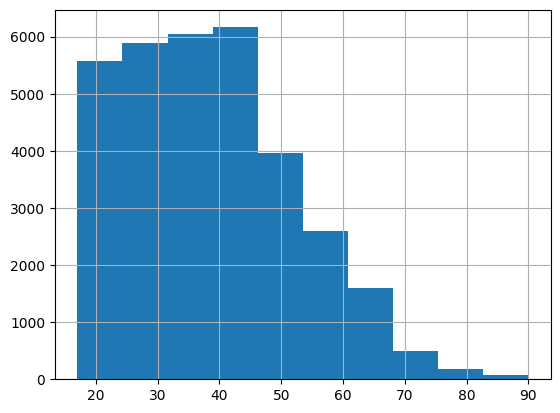

In [ ]:
data['age'].hist();

####Изменим размер фигуры и применим метод hist() для визуализации распределения нескольких признаков:

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

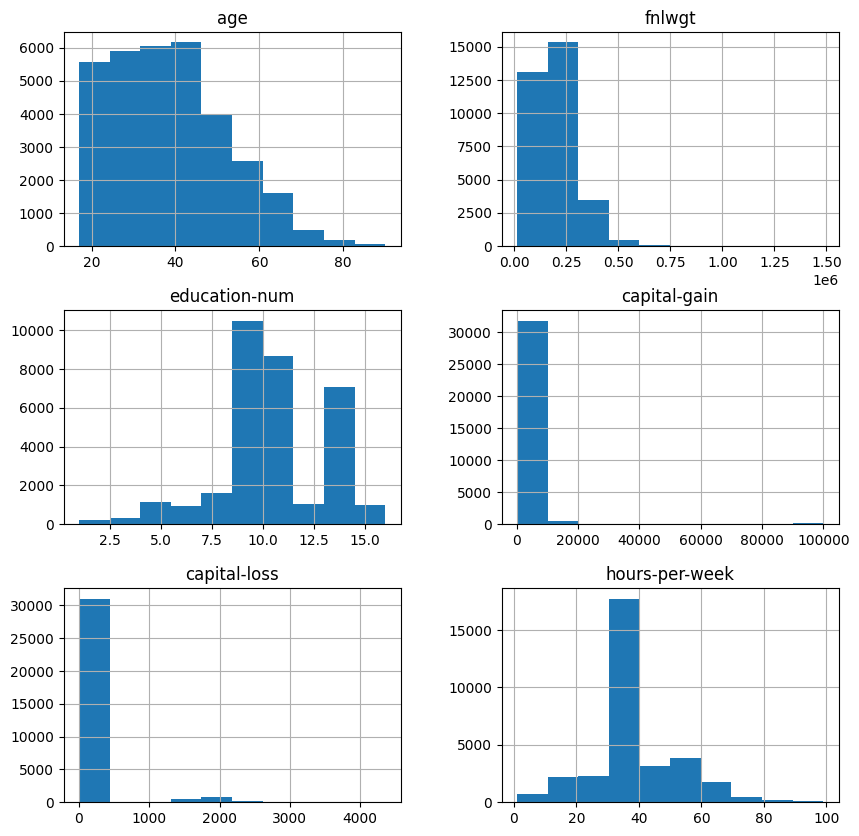

In [ ]:
data.hist(figsize=(10, 10))

####Аналогичный тип графика можно получить с использованием matplotlib:

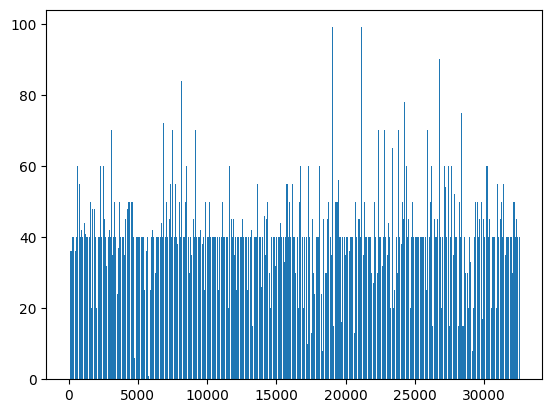

In [ ]:
plt.bar(data.index, data['hours-per-week'])
plt.show()

####График распределения

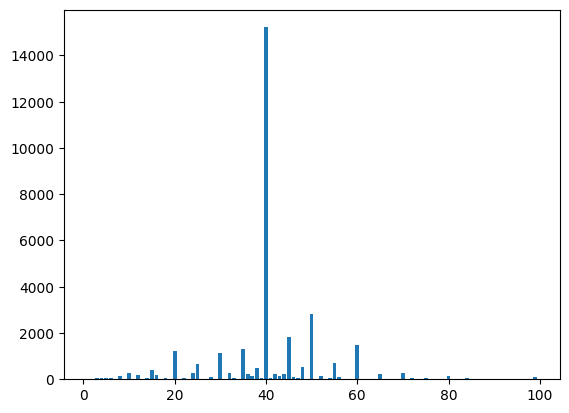

In [ ]:
hist = data['hours-per-week'].value_counts()
plt.bar(hist.index, hist);

####Использование библиотеки Seaborn для построения диаграммы типа "ящик с усами"

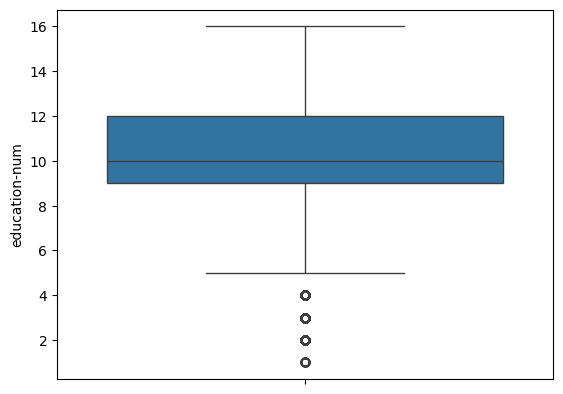

In [ ]:
sns.boxplot(data['education-num']);

####Ниже представлен код и результат построения графиков для анализа уровня образования по полу

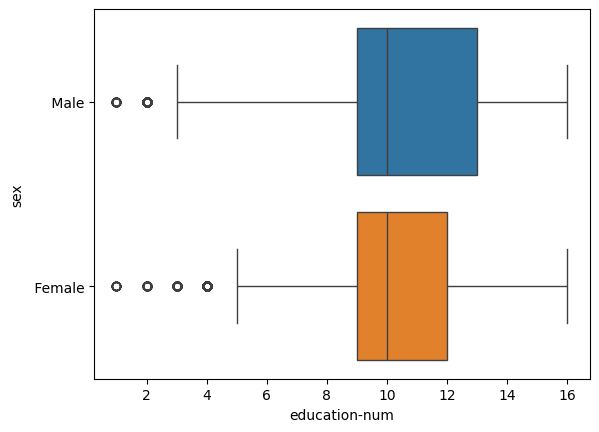

In [ ]:
sns.boxplot(y='sex', x='education-num', data=data, hue='sex');

###5. Визуализация категориальных признаков

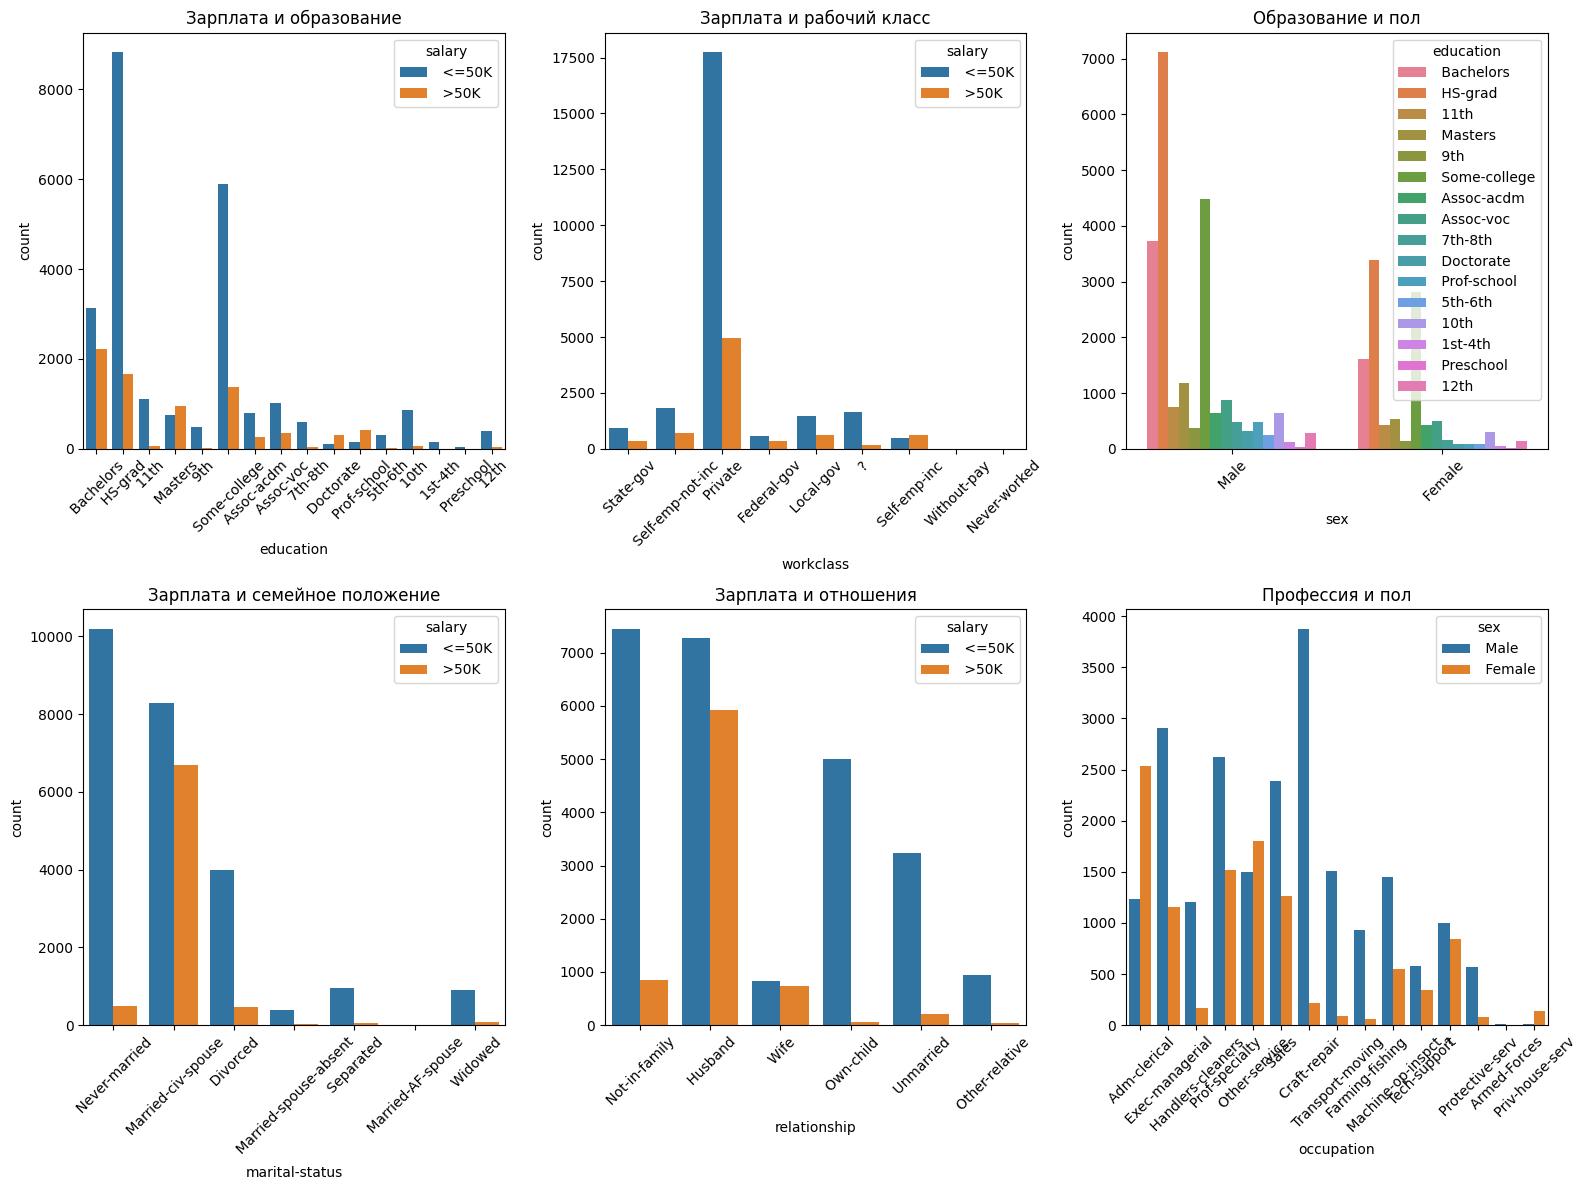

In [ ]:
fig, (axes1, axes2) = plt.subplots(ncols=3, nrows=2, figsize=(16, 12))

sns.countplot(data=data, x="education", hue="salary", ax=axes1[0])
axes1[0].set_title('Зарплата и образование')
axes1[0].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x="workclass", hue="salary", ax=axes1[1])
axes1[1].set_title('Зарплата и рабочий класс')
axes1[1].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x="sex", hue="education", ax=axes1[2])
axes1[2].set_title('Образование и пол')
axes1[2].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x="marital-status", hue="salary", ax=axes2[0])
axes2[0].set_title('Зарплата и семейное положение')
axes2[0].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x="relationship", hue="salary", ax=axes2[1])
axes2[1].set_title('Зарплата и отношения')
axes2[1].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x="occupation", hue="sex", ax=axes2[2])
axes2[2].set_title('Профессия и пол')
axes2[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

####Гистограмма, показывающая ТОП-3 образований по частоте высоких зарплат

/tmp/ipython-input-3209735174.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['salary_binary'] = data['salary'].replace({' <=50K': 0, ' >50K': 1}).astype(int)


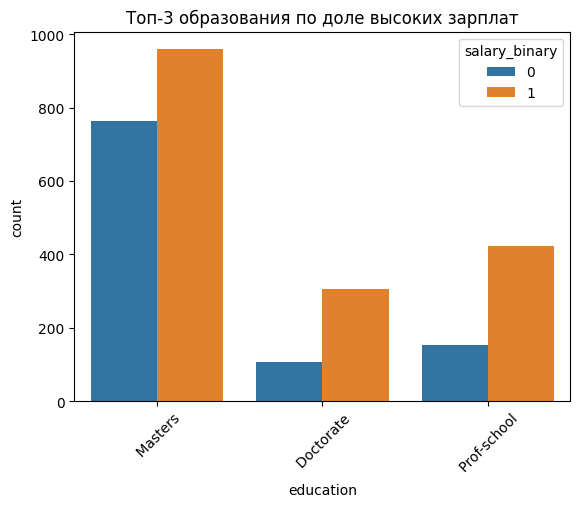

In [ ]:
data['salary_binary'] = data['salary'].replace({' <=50K': 0, ' >50K': 1}).astype(int)
top_education_salary = data.groupby('education')['salary_binary'].mean().sort_values(ascending=False).head(3).index
sns.countplot(data=data[data['education'].isin(top_education_salary)],
              x='education', hue='salary_binary')
plt.title('Топ-3 образования по доле высоких зарплат')
plt.xticks(rotation=45)
plt.show()

####Образование и зарплата (отсортировано по доле высоких зарплат)

/tmp/ipython-input-3459745840.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['salary_binary'] = data['salary'].replace({' <=50K': 0, ' >50K': 1}).astype(int)


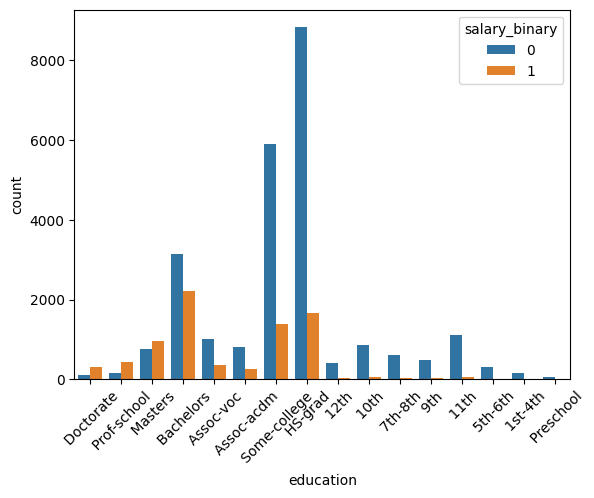

In [ ]:
data['salary_binary'] = data['salary'].replace({' <=50K': 0, ' >50K': 1}).astype(int)
top_education_salary = data.groupby('education')['salary_binary'].mean().sort_values(ascending=False).index
sns.countplot(data=data[data['education'].isin(top_education_salary)],
              x='education', hue='salary_binary', order=top_education_salary)
plt.xticks(rotation=45)
plt.show()

####Распределение по образованию

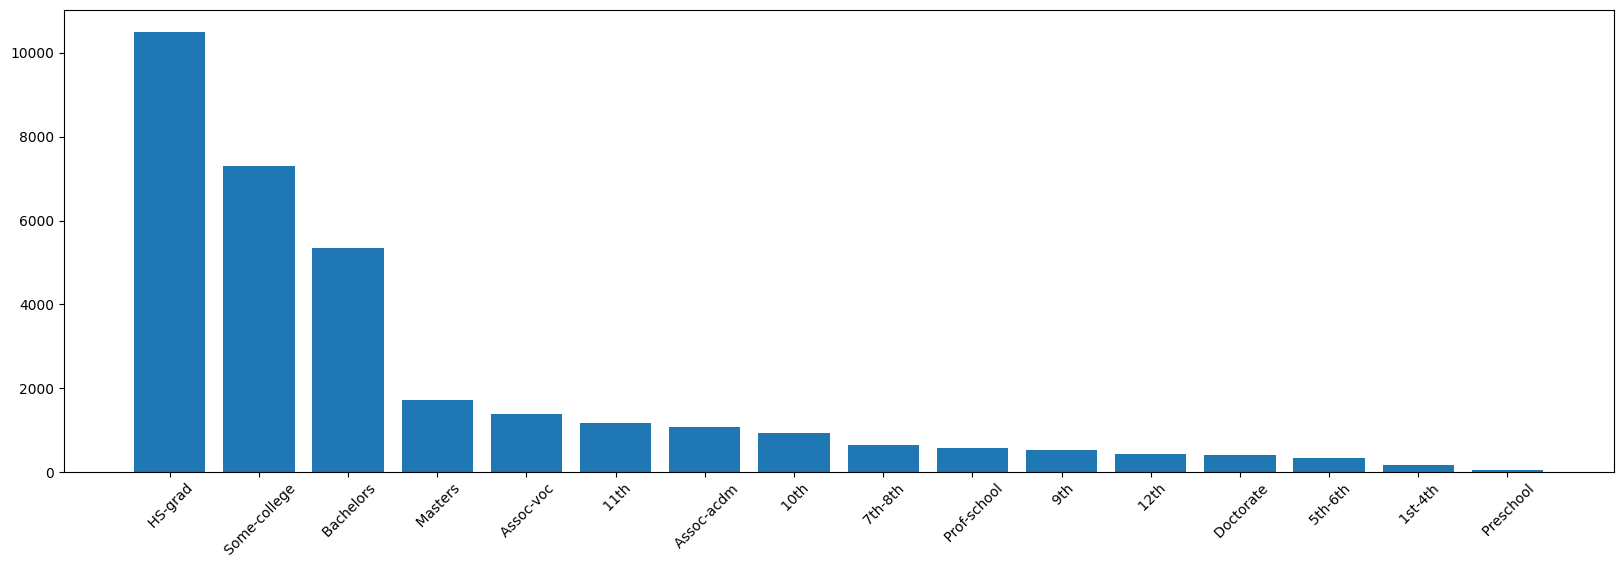

In [ ]:
fig = plt.subplots(figsize=(20,6))
hist = data['education'].value_counts()
plt.bar(hist.index.astype("str"), hist)
plt.xticks(rotation=45)
plt.show()

####Попарное распределение индексов

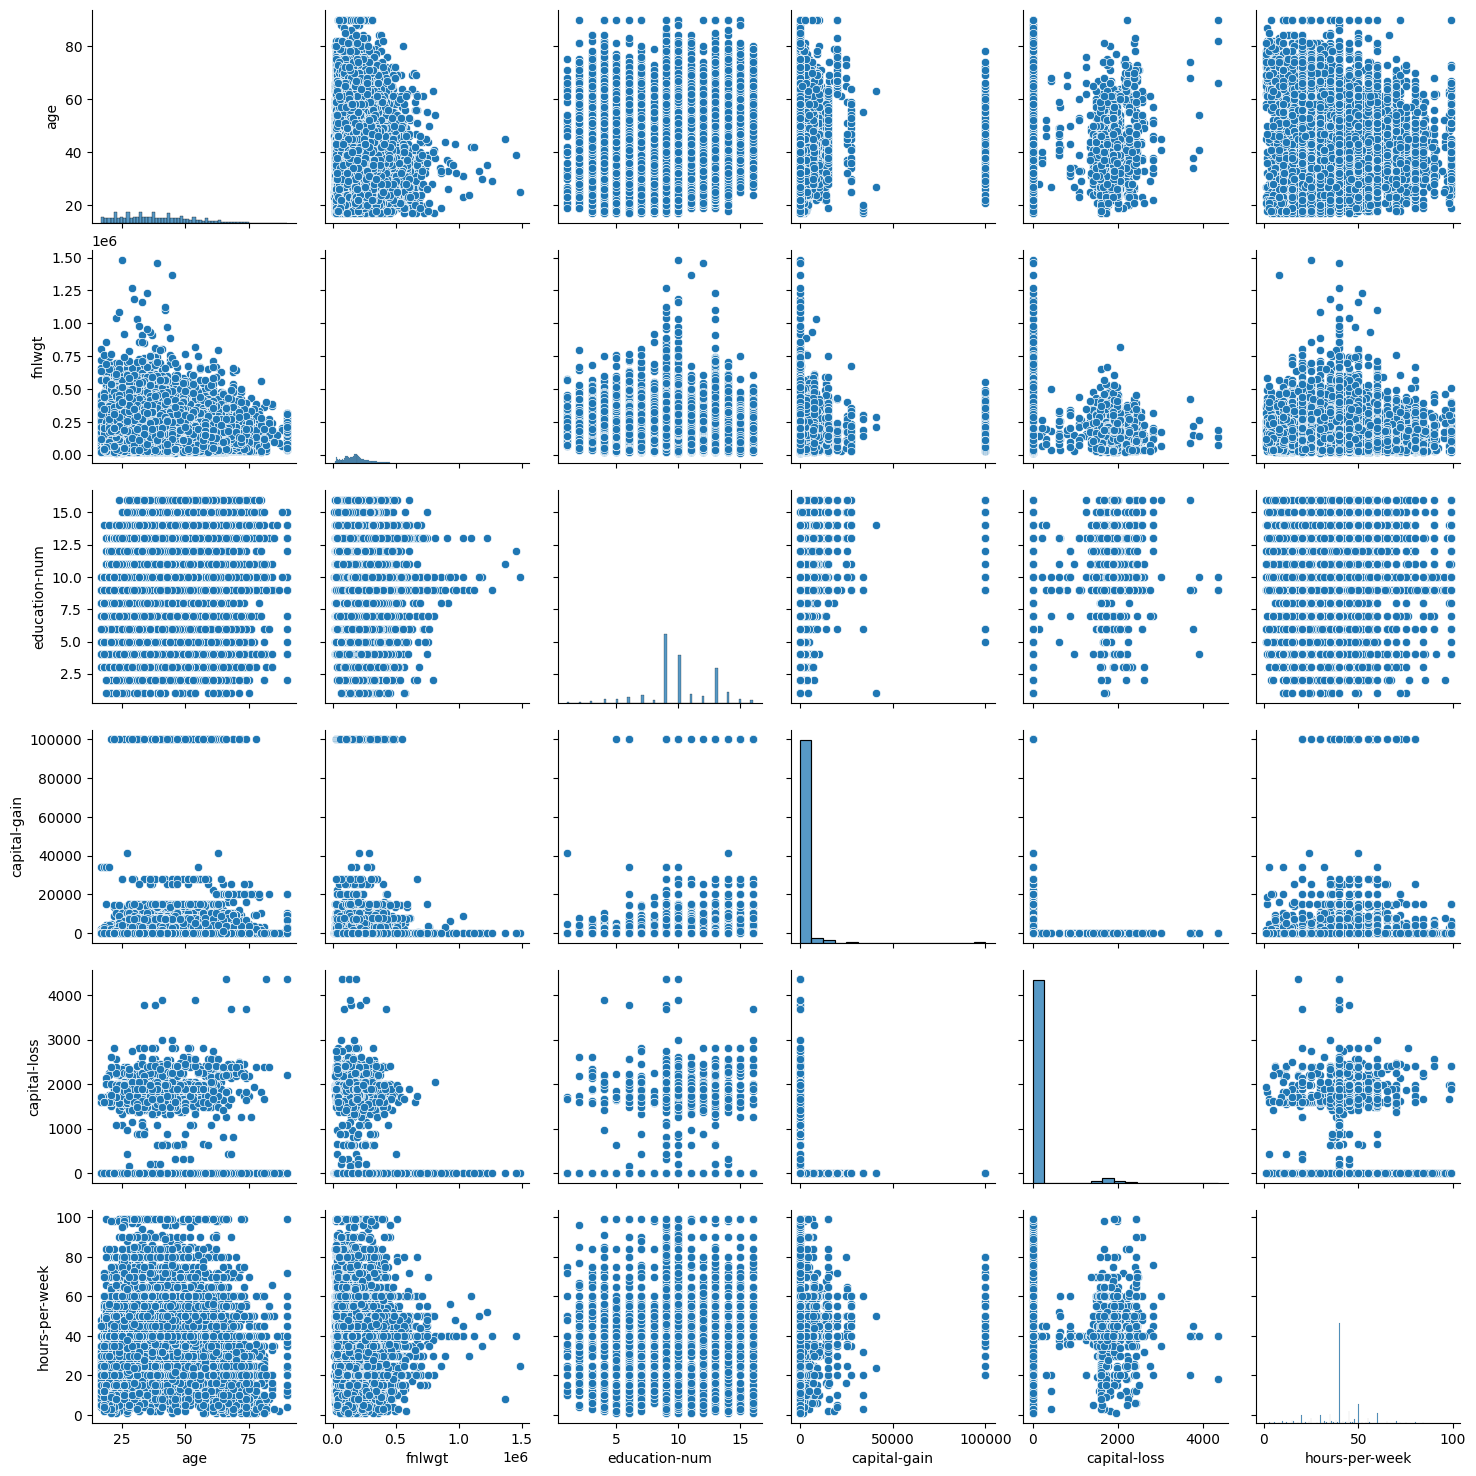

In [ ]:
sns.pairplot(data);

####Добавление целевого признака:

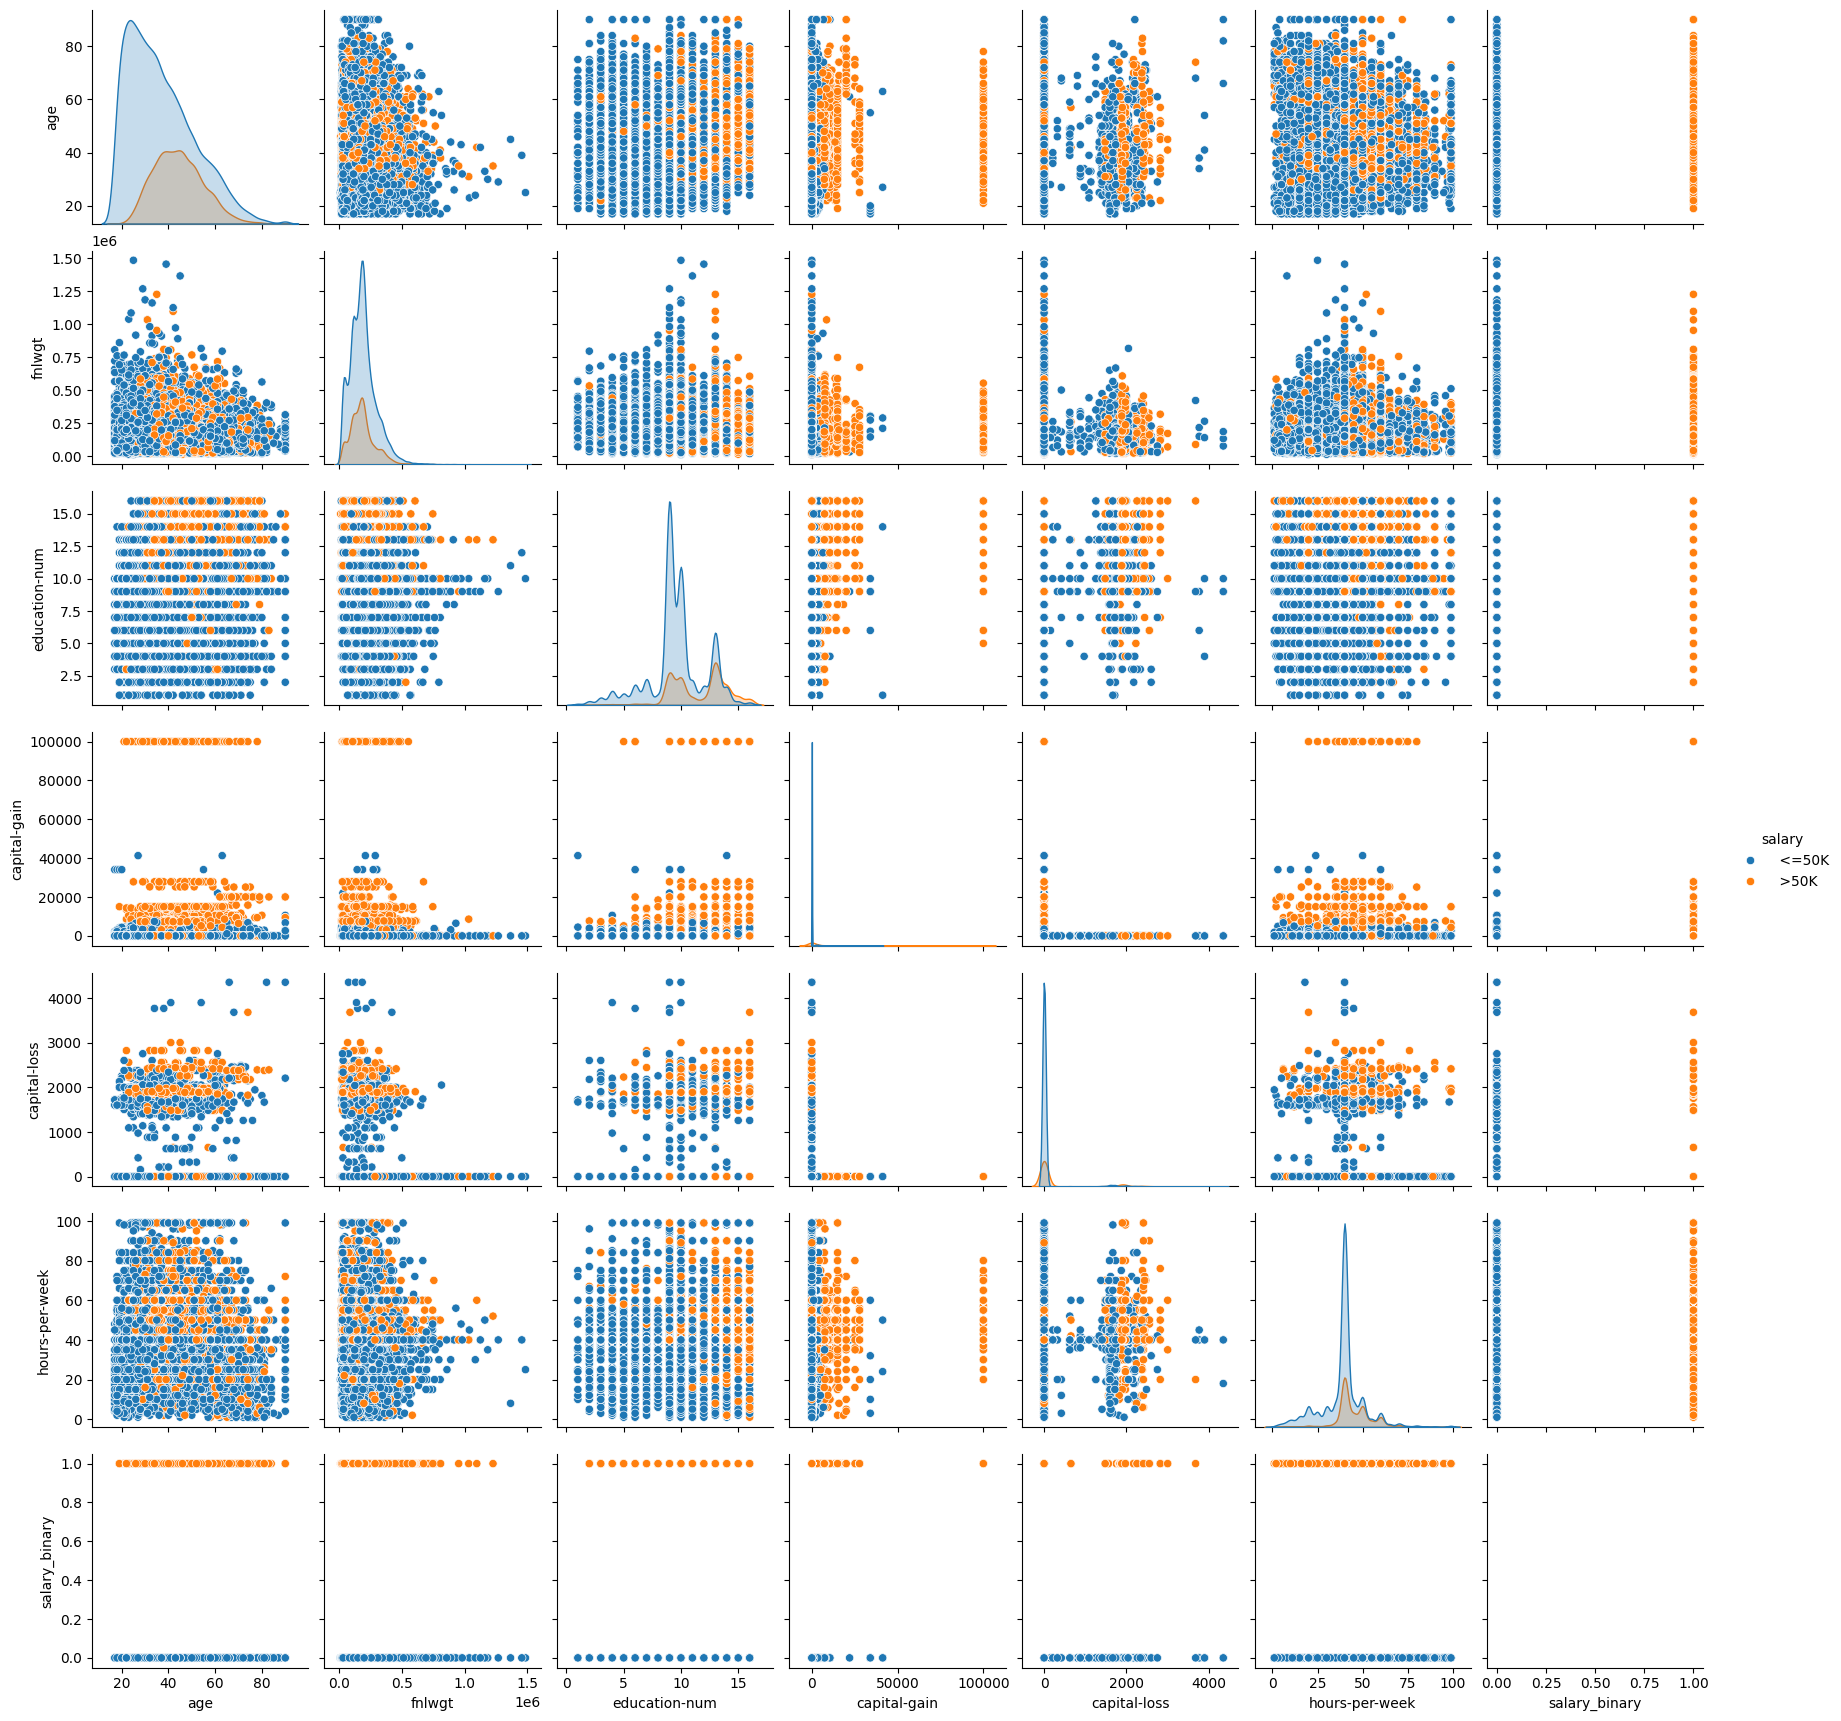

In [ ]:
sns.pairplot(data, hue="salary");

####Использование matplotlib, подписей данных, заголовков и простейших пользовательских цветов:

Text(0, 0.5, 'Часов работы в неделю')

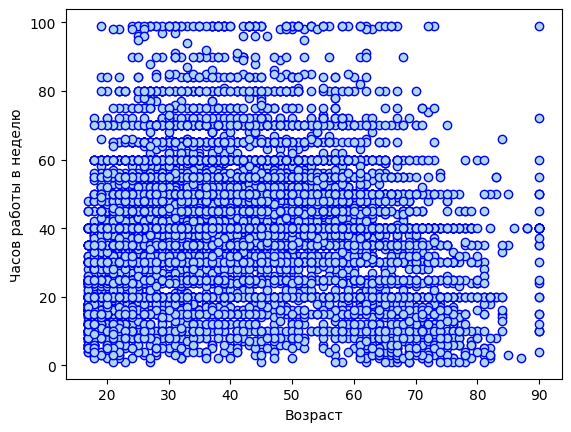

In [ ]:
plt.scatter(data['age'],
            data['hours-per-week'],
            color='lightblue', edgecolors='blue')

plt.xlabel('Возраст')
plt.ylabel('Часов работы в неделю')

####Раскрашивание данных:

Text(0, 0.5, 'Часов работы в неделю')

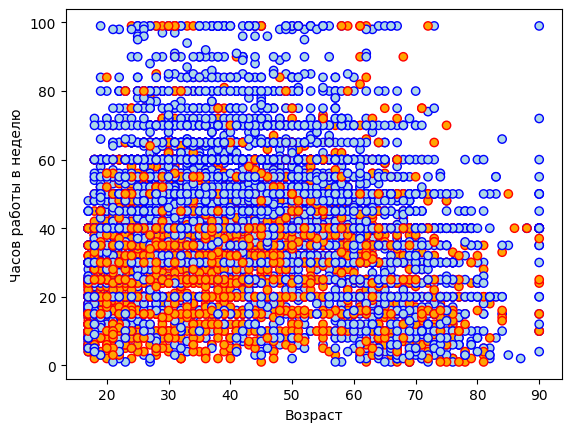

In [ ]:
c = data['sex'].map({' Male': 'lightblue', ' Female': 'orange'})
edge_c = data['sex'].map({' Male': 'blue', ' Female': 'red'})
plt.scatter(data['age'], data['hours-per-week'], color=c, edgecolors=edge_c)
plt.xlabel('Возраст')
plt.ylabel('Часов работы в неделю')

####Раскраска по полу

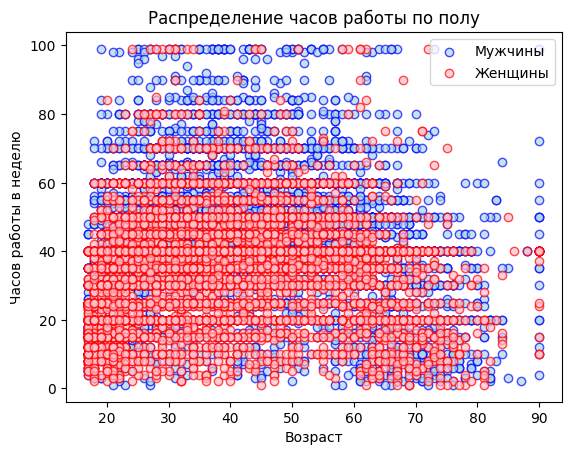

In [ ]:
data_male = data[data['sex'] == ' Male']
data_female = data[data['sex'] == ' Female']

plt.scatter(data_male['age'], data_male['hours-per-week'],
            color='lightblue', edgecolors='blue', label='Мужчины', alpha=0.7)

plt.scatter(data_female['age'], data_female['hours-per-week'],
            color='pink', edgecolors='red', label='Женщины', alpha=0.7)

plt.xlabel('Возраст')
plt.ylabel('Часов работы в неделю')
plt.title('Распределение часов работы по полу')
plt.legend(loc='best')
plt.show()

###6. Корреляция признаков

In [ ]:
data.corr(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


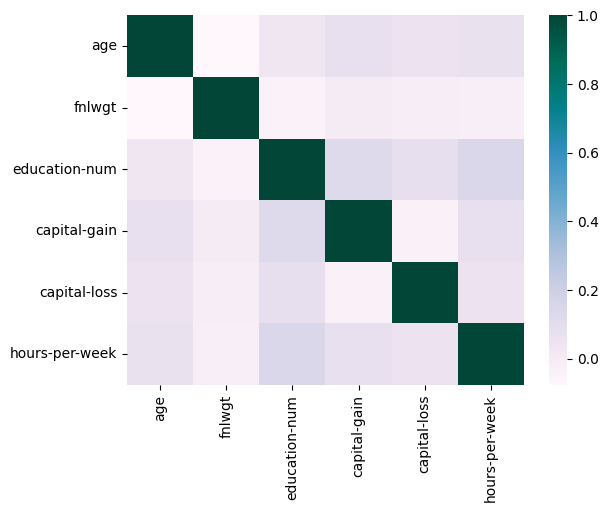

In [ ]:
sns.heatmap(data.corr(numeric_only=True), cmap=plt.cm.PuBuGn);